## **Import Libraries**

In [1]:
# Import All Libraries

# Data preparation
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
import xgboost as xgb
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor 

from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import tree

# **************************************************************

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Models
from sklearn.model_selection import GridSearchCV
# Evaluation
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

%matplotlib inline

## **Read Old File**

In [2]:
#the first version of the data
Booking=pd.read_excel('BookingDataCleanedver2.xlsx')


## **Booking DataFraem Columns**

In [3]:
Booking.columns

Index(['Unnamed: 0', 'URLS', 'Title', 'Price', 'Check_in', 'Check_Out', 'Rate',
       'Address', 'latlon', 'Score', 'TYPE', 'Checkin_day', 'Checkout_day',
       'Year', 'Month', 'Day', 'Check_Month', 'lon', 'lat', 'Airportlon',
       'Airportlat', 'Distance'],
      dtype='object')

## **BookingCopy DataFrame and Rename Columns**



In [4]:
#make a cpoy of dataset
Bookingcopy=Booking.copy()

Bookingcopy.rename(columns = {'Rate':'Stars','Score':'Rate','TYPE':'ResidenceType','Title':'ResidenceName','Check_in':'CheckIn','Check_out':'CheckOut','Distance':'DistanceToAirport','lon':'ResidenceLongitude','lat':'ResidenceLatitude','Airportlon':'AirPortLongitude','Airportlat':'AirportLatitude','Check_Month':'CheckInMonth','Checkin_day':'CheckInDay','Checkout_day':'CheckOutDay'}, inplace = True)
Bookingcopy.rename(columns = {'Check_Out':'CheckOut'}, inplace = True)

## **Rename CheckOut Columns**

## **Drop Columns and Rename Bookingcopy to Bookingcopyver2**

In [5]:
cols=['Unnamed: 0','URLS','ResidenceName','CheckIn','CheckOut','Address','latlon','Year',
      'ResidenceLongitude','ResidenceLatitude',"CheckOutDay","AirPortLongitude"
      ,"AirportLatitude","CheckInMonth"]
Bookingcopyver2=Bookingcopy.drop(cols, axis=1)
Bookingcopyver2

,Price,Stars,Rate,ResidenceType,CheckInDay,Month,Day,DistanceToAirport
0,360.00,3,8.1,Room,Saturday,9,4,32.310127
1,281.25,3,7.3,Room,Saturday,9,4,22.247344
2,348.75,4,8.6,Room,Saturday,9,4,23.234800
3,172.50,3,6.6,Studio,Saturday,9,4,33.514213
4,135.00,3,5.5,Room,Saturday,9,4,33.941213
...,...,...,...,...,...,...,...,...
105663,1121.25,4,10.0,Apartment,Friday,9,2,18.723535
105664,1233.75,3,6.7,Apartment,Friday,9,2,20.986195
105665,1233.75,4,4.5,Apartment,Friday,9,2,20.986195
105666,240.00,3,7.7,Studio,Friday,9,2,19.326650


## **Categorize Rating**

In [6]:
def categorize_Score(Score):
    if (Score>= 1.0 and  Score<= 2.9):
        return 'Underrated'
    elif (Score>= 3.0 and  Score<= 4.9):
        return 'Fair'
    elif (Score>= 5.0 and  Score<= 6.9):
        return 'Pleasent'
    elif (Score>= 7.0 and  Score<= 8.9):
        return 'Good'
    elif (Score>= 9.0 and  Score<= 10.0):
        return 'Wonerful'
Bookingcopyver2["ReviewRating"]=Bookingcopyver2["Rate"].apply(categorize_Score)

In [7]:
Bookingcopyver2.ReviewRating.value_counts()

Good          69614
Pleasent      21151
Wonerful      12857
Fair           1719
Underrated      327
Name: ReviewRating, dtype: int64

## **MapReviewRating**

In [8]:
Bookingcopyver2['ReviewRatingVec'] = Bookingcopyver2['ReviewRating'].map({'Underrated': 0, 'Fair': 1, "Pleasent":2, "Good":3, "Wonerful":4})

In [9]:
Bookingcopyver2.ReviewRatingVec.value_counts()

3    69614
2    21151
4    12857
1     1719
0      327
Name: ReviewRatingVec, dtype: int64

In [10]:
Season=[]
for Month in Bookingcopyver2["Month"]:
    if (Month == 3) |(Month == 4) | (Month == 5 ):
        Season.append("Spring")
    elif (Month == 6) | (Month == 7) | (Month == 8 ):
        Season.append("Summer")
    elif (Month == 9) | (Month == 10) | (Month == 11 ):
        Season.append("Fall")
    else:
        Season.append("Winter")

Bookingcopyver2.insert(7,"Season",Season)

In [11]:
Bookingcopyver2.head()

,Price,Stars,Rate,ResidenceType,CheckInDay,Month,Day,Season,DistanceToAirport,ReviewRating,ReviewRatingVec
0,360.00,3,8.1,Room,Saturday,9,4,Fall,32.310127,Good,3
1,281.25,3,7.3,Room,Saturday,9,4,Fall,22.247344,Good,3
2,348.75,4,8.6,Room,Saturday,9,4,Fall,23.234800,Good,3
3,172.50,3,6.6,Studio,Saturday,9,4,Fall,33.514213,Pleasent,2
4,135.00,3,5.5,Room,Saturday,9,4,Fall,33.941213,Pleasent,2


In [12]:
Bookingcopyver2['Season'].value_counts()

Fall      38104
Winter    28538
Spring    21284
Summer    17742
Name: Season, dtype: int64

In [13]:
Bookingcopyver2.Stars.value_counts()

3    48847
4    44136
5    11372
2     1032
1      281
Name: Stars, dtype: int64

In [14]:
Bookingcopyver2['Starsvec'] = Bookingcopyver2['Stars'].map({1: 0, 2: 1, 3:2, 4:3,5:4})

In [15]:
Bookingcopyver2.Starsvec.value_counts()

2    48847
3    44136
4    11372
1     1032
0      281
Name: Starsvec, dtype: int64

In [16]:
Bookingcopyver2.ResidenceType.value_counts()

Room         44774
Apartment    37647
Studio       13862
Suite         5931
House         1841
Chalet        1613
Name: ResidenceType, dtype: int64

In [17]:
Bookingcopyver2['ResidenceTypevec'] = Bookingcopyver2['ResidenceType'].map({'Studio': 0, 'Room': 1, "Apartment":2, "Suite":3,"Chalet":4, "House":5})

In [18]:
Bookingcopyver2.ResidenceTypevec.value_counts()

1    44774
2    37647
0    13862
3     5931
5     1841
4     1613
Name: ResidenceTypevec, dtype: int64

In [19]:
result = [] # create empty list and fill it based on the conditions
for value in Bookingcopyver2["DistanceToAirport"]:
    if value <= 16:
        result.append("Short")
    elif value > 16 and value <=23:
        result.append("Medium")
    elif value > 23:
        result.append("Long")       
Bookingcopyver2.insert(4,"Closness_to_Airport",result)

In [20]:
Bookingcopyver2['Closness_to_Airportvec'] = Bookingcopyver2['Closness_to_Airport'].map({'Short': 0, 'Medium': 1, "Long":2})

In [21]:
Bookingcopyver2['Closness_to_Airportvec'].value_counts()

2    50678
1    46848
0     8142
Name: Closness_to_Airportvec, dtype: int64

In [22]:
Bookingcopyver2['CheckInDayvec'] = Bookingcopyver2['CheckInDay'].map({'Sunday': 0,'Monday':1,'Tuesday':2, 'Wednesday': 3 ,'Thursday':4 ,'Friday':5 , 'Saturday':6})

In [23]:
Daylist=[]
for Day in Bookingcopyver2["CheckInDayvec"]:
    if (Day == 0) |(Day == 1) | (Day == 2 )| (Day == 3 ) | (Day == 4):
        Daylist.append("JobDay")
    elif (Day == 5) | (Day == 6 ):
        Daylist.append("Weekend")
    else:
        Daylist.append("None")

Bookingcopyver2.insert(16,"WeekDay",Daylist)

In [24]:
Bookingcopyver2["WeekDay"].value_counts()

JobDay     75318
Weekend    30350
Name: WeekDay, dtype: int64

In [25]:
#convert the categorical values to numerical values
Bookingcopyver2['SeasonVec'] = Bookingcopyver2['Season'].map({'Winter': 0, 'Spring': 1, 'Summer':2, 'Fall':3})

In [26]:
# Convert WeekDayVec to numeric
Bookingcopyver2['WeekDayVec'] = Bookingcopyver2['WeekDay'].map({'JobDay': 0,'Weekend':1})

In [27]:
#Numberic
Bookingcopyver2[['ReviewRatingVec', 'Starsvec', 'ResidenceTypevec','Closness_to_Airportvec',"WeekDayVec","SeasonVec"]]

,ReviewRatingVec,Starsvec,ResidenceTypevec,Closness_to_Airportvec,WeekDayVec,SeasonVec
0,3,2,1,2,1,3
1,3,2,1,1,1,3
2,3,3,1,2,1,3
3,2,2,0,2,1,3
4,2,2,1,2,1,3
...,...,...,...,...,...,...
105663,4,3,2,1,1,3
105664,2,2,2,1,1,3
105665,1,3,2,1,1,3
105666,3,2,0,1,1,3


In [28]:
Bookingcopyver2.head(1)

,Price,Stars,Rate,ResidenceType,Closness_to_Airport,CheckInDay,Month,Day,Season,DistanceToAirport,ReviewRating,ReviewRatingVec,Starsvec,ResidenceTypevec,Closness_to_Airportvec,CheckInDayvec,WeekDay,SeasonVec,WeekDayVec
0,360.0,3,8.1,Room,Long,Saturday,9,4,Fall,32.310127,Good,3,2,1,2,6,Weekend,3,1


In [29]:
Bookingcopyver2["Starsvec"].value_counts()

2    48847
3    44136
4    11372
1     1032
0      281
Name: Starsvec, dtype: int64

In [30]:
Bookingcopyver2.columns

Index(['Price', 'Stars', 'Rate', 'ResidenceType', 'Closness_to_Airport',
       'CheckInDay', 'Month', 'Day', 'Season', 'DistanceToAirport',
       'ReviewRating', 'ReviewRatingVec', 'Starsvec', 'ResidenceTypevec',
       'Closness_to_Airportvec', 'CheckInDayvec', 'WeekDay', 'SeasonVec',
       'WeekDayVec'],
      dtype='object')

In [31]:
### Categorical 
Bookingcopyver2[["ReviewRating","Stars","ResidenceType","Closness_to_Airport","WeekDay","Season"]]

,ReviewRating,Stars,ResidenceType,Closness_to_Airport,WeekDay,Season
0,Good,3,Room,Long,Weekend,Fall
1,Good,3,Room,Medium,Weekend,Fall
2,Good,4,Room,Long,Weekend,Fall
3,Pleasent,3,Studio,Long,Weekend,Fall
4,Pleasent,3,Room,Long,Weekend,Fall
...,...,...,...,...,...,...
105663,Wonerful,4,Apartment,Medium,Weekend,Fall
105664,Pleasent,3,Apartment,Medium,Weekend,Fall
105665,Fair,4,Apartment,Medium,Weekend,Fall
105666,Good,3,Studio,Medium,Weekend,Fall


In [32]:
Bookingcopyver2.head()

,Price,Stars,Rate,ResidenceType,Closness_to_Airport,CheckInDay,Month,Day,Season,DistanceToAirport,ReviewRating,ReviewRatingVec,Starsvec,ResidenceTypevec,Closness_to_Airportvec,CheckInDayvec,WeekDay,SeasonVec,WeekDayVec
0,360.00,3,8.1,Room,Long,Saturday,9,4,Fall,32.310127,Good,3,2,1,2,6,Weekend,3,1
1,281.25,3,7.3,Room,Medium,Saturday,9,4,Fall,22.247344,Good,3,2,1,1,6,Weekend,3,1
2,348.75,4,8.6,Room,Long,Saturday,9,4,Fall,23.234800,Good,3,3,1,2,6,Weekend,3,1
3,172.50,3,6.6,Studio,Long,Saturday,9,4,Fall,33.514213,Pleasent,2,2,0,2,6,Weekend,3,1
4,135.00,3,5.5,Room,Long,Saturday,9,4,Fall,33.941213,Pleasent,2,2,1,2,6,Weekend,3,1


# Prepare the dataset for ML models

In [33]:
BookingML=Bookingcopyver2
cols=['ResidenceType','Closness_to_Airport','CheckInDay','Season','ReviewRating','WeekDay']
BookingML=BookingML.drop(cols, axis=1)
BookingML

,Price,Stars,Rate,Month,Day,DistanceToAirport,ReviewRatingVec,Starsvec,ResidenceTypevec,Closness_to_Airportvec,CheckInDayvec,SeasonVec,WeekDayVec
0,360.00,3,8.1,9,4,32.310127,3,2,1,2,6,3,1
1,281.25,3,7.3,9,4,22.247344,3,2,1,1,6,3,1
2,348.75,4,8.6,9,4,23.234800,3,3,1,2,6,3,1
3,172.50,3,6.6,9,4,33.514213,2,2,0,2,6,3,1
4,135.00,3,5.5,9,4,33.941213,2,2,1,2,6,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105663,1121.25,4,10.0,9,2,18.723535,4,3,2,1,5,3,1
105664,1233.75,3,6.7,9,2,20.986195,2,2,2,1,5,3,1
105665,1233.75,4,4.5,9,2,20.986195,1,3,2,1,5,3,1
105666,240.00,3,7.7,9,2,19.326650,3,2,0,1,5,3,1


In [34]:
BookingML.isnull().sum()

Price                     0
Stars                     0
Rate                      0
Month                     0
Day                       0
DistanceToAirport         0
ReviewRatingVec           0
Starsvec                  0
ResidenceTypevec          0
Closness_to_Airportvec    0
CheckInDayvec             0
SeasonVec                 0
WeekDayVec                0
dtype: int64

#### Datasets for Regression

In [35]:
#Bookingcopyver2['ResidenceTypevec'] = Bookingcopyver2['ResidenceType']
#.map({'Studio': 0, 'Room': 1, "Apartment":2, "Suite":3,"Chalet":4, "House":5})
Room=BookingML[BookingML['ResidenceTypevec']==1]
Studio=BookingML[BookingML['ResidenceTypevec']==0]
Suite=BookingML[BookingML['ResidenceTypevec']==3]

-------

### Datasets for Classification 

In [36]:
BookingML

,Price,Stars,Rate,Month,Day,DistanceToAirport,ReviewRatingVec,Starsvec,ResidenceTypevec,Closness_to_Airportvec,CheckInDayvec,SeasonVec,WeekDayVec
0,360.00,3,8.1,9,4,32.310127,3,2,1,2,6,3,1
1,281.25,3,7.3,9,4,22.247344,3,2,1,1,6,3,1
2,348.75,4,8.6,9,4,23.234800,3,3,1,2,6,3,1
3,172.50,3,6.6,9,4,33.514213,2,2,0,2,6,3,1
4,135.00,3,5.5,9,4,33.941213,2,2,1,2,6,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105663,1121.25,4,10.0,9,2,18.723535,4,3,2,1,5,3,1
105664,1233.75,3,6.7,9,2,20.986195,2,2,2,1,5,3,1
105665,1233.75,4,4.5,9,2,20.986195,1,3,2,1,5,3,1
105666,240.00,3,7.7,9,2,19.326650,3,2,0,1,5,3,1


In [37]:
#drop the continous columns
cols=['DistanceToAirport',"Rate","Stars","Day"]
BookingMLCat=BookingML.drop(cols, axis=1)

In [38]:
BookingMLCat

,Price,Month,ReviewRatingVec,Starsvec,ResidenceTypevec,Closness_to_Airportvec,CheckInDayvec,SeasonVec,WeekDayVec
0,360.00,9,3,2,1,2,6,3,1
1,281.25,9,3,2,1,1,6,3,1
2,348.75,9,3,3,1,2,6,3,1
3,172.50,9,2,2,0,2,6,3,1
4,135.00,9,2,2,1,2,6,3,1
...,...,...,...,...,...,...,...,...,...
105663,1121.25,9,4,3,2,1,5,3,1
105664,1233.75,9,2,2,2,1,5,3,1
105665,1233.75,9,1,3,2,1,5,3,1
105666,240.00,9,3,2,0,1,5,3,1


### Classification of Closness to Airport column

In [39]:
# baseline
BookingMLCat["Closness_to_Airportvec"].value_counts(normalize=True)

2    0.479596
1    0.443351
0    0.077053
Name: Closness_to_Airportvec, dtype: float64

#### Logistic Regression

In [40]:
target = "Closness_to_Airportvec"
# feature set --> it cannot have the target 
X =BookingMLCat.drop(target, axis=1)
# target set 
y = BookingMLCat[target]
# split with  random_state= 42 and train size= 80% so the test size will be 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=42)

In [41]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

In [42]:
Logisticclassifier = LogisticRegression(random_state = 42)
Logisticclassifier.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

In [43]:
y_pred_Log = Logisticclassifier.predict(X_test_sc)

In [44]:
Logisticclassifier.score(X_test_sc, y_test)

0.5915586259108545

/Users/shodz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


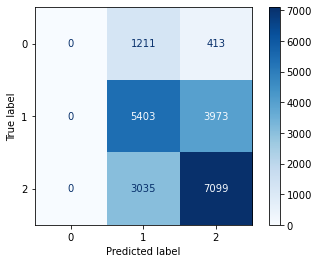

In [45]:
plot_confusion_matrix(Logisticclassifier, X_test_sc, y_test,cmap='Blues');

#### Classification for AirportDistance (Random forest)

In [46]:
#Classification for AirportDistance (Random forest)
class_forest = RandomForestClassifier(n_estimators = 15, criterion = 'gini', random_state = 42, max_depth=8)
class_forest.fit(X_train, y_train)
preds_class_Rf = class_forest.predict(X_test)

/Users/shodz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


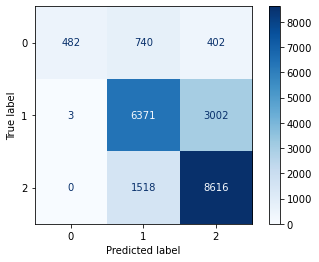

In [47]:
plot_confusion_matrix(class_forest, X_test, y_test,cmap='Blues');

In [48]:
print(classification_report(y_test,preds_class_Rf))

              precision    recall  f1-score   support

           0       0.99      0.30      0.46      1624
           1       0.74      0.68      0.71      9376
           2       0.72      0.85      0.78     10134

    accuracy                           0.73     21134
   macro avg       0.82      0.61      0.65     21134
weighted avg       0.75      0.73      0.72     21134



#### Classification for Distance (XGBoost)

In [49]:
# XGboost object
classifier = XGBClassifier()
#  fit the model of XGboost
classifier.fit(X_train, y_train)
y_pred_XGB = classifier.predict(X_test)

/Users/shodz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


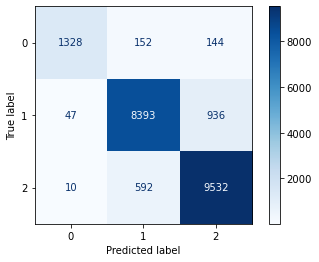

In [50]:
plot_confusion_matrix(classifier, X=X_test, y_true=y_test, cmap='Blues')

In [51]:
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1624
           1       0.92      0.90      0.91      9376
           2       0.90      0.94      0.92     10134

    accuracy                           0.91     21134
   macro avg       0.93      0.88      0.90     21134
weighted avg       0.91      0.91      0.91     21134



### Classification for Weekday column

In [52]:
BookingMLCat["WeekDayVec"].value_counts(normalize=True)

0    0.71278
1    0.28722
Name: WeekDayVec, dtype: float64

In [53]:
target = "WeekDayVec"
# feature set --> it cannot have the target 
X =BookingMLCat.drop(target, axis=1)
# target set 
y = BookingMLCat[target]
# split with  random_state= 42 and train size= 80% so the test size will be 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)

#### Classification for Weekday (Random forest)

In [54]:
class_forest2 = RandomForestClassifier(n_estimators = 2, criterion = 'gini', random_state = 42, max_depth=8)
class_forest2.fit(X_train, y_train)
preds_class_Rf2 = class_forest2.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22557
           1       1.00      1.00      1.00      9144

    accuracy                           1.00     31701
   macro avg       1.00      1.00      1.00     31701
weighted avg       1.00      1.00      1.00     31701



/Users/shodz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


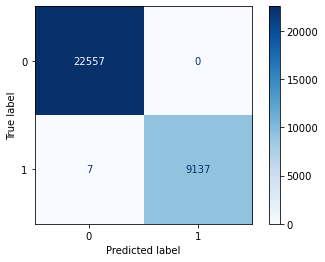

In [55]:
plot_confusion_matrix(class_forest2, X_test, y_test,cmap='Blues');
print(classification_report(y_test,preds_class_Rf2))

#### Clasification for Star column

In [56]:
BookingMLCat["Starsvec"].value_counts(normalize=True)

2    0.462269
3    0.417686
4    0.107620
1    0.009766
0    0.002659
Name: Starsvec, dtype: float64

In [57]:
target = "Starsvec"
# feature set --> it cannot have the target 
X =BookingMLCat.drop(target, axis=1)
# target set 
y = BookingMLCat[target]

In [58]:
# split with  random_state= 42 and train size= 80% so the test size will be 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)

In [59]:
class_forest3 = RandomForestClassifier(n_estimators = 15, criterion = 'gini', random_state = 42, max_depth=8)
class_forest3.fit(X_train, y_train)
preds_class_Rf3 = class_forest3.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.31      0.48        86
           1       0.86      0.36      0.51       310
           2       0.90      0.80      0.85     14573
           3       0.74      0.92      0.82     13379
           4       0.94      0.53      0.68      3353

    accuracy                           0.82     31701
   macro avg       0.89      0.59      0.67     31701
weighted avg       0.83      0.82      0.81     31701



/Users/shodz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


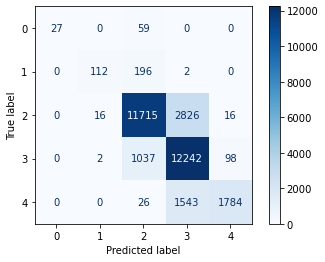

In [60]:
plot_confusion_matrix(class_forest3, X_test, y_test,cmap='Blues');
print(classification_report(y_test,preds_class_Rf3))

#### XGBoost Model

In [61]:
# XGboost object
classifier2 = XGBClassifier()
#  fit the model of XGboost
classifier2.fit(X_train, y_train)
y_pred_XGB = classifier2.predict(X_test)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        86
           1       0.98      0.95      0.97       310
           2       0.96      0.95      0.96     14573
           3       0.94      0.94      0.94     13379
           4       0.94      0.94      0.94      3353

    accuracy                           0.95     31701
   macro avg       0.96      0.95      0.96     31701
weighted avg       0.95      0.95      0.95     31701



/Users/shodz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


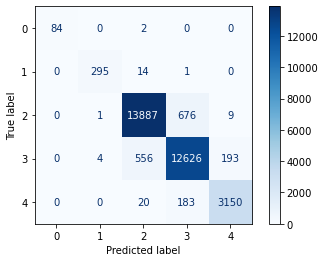

In [62]:
plot_confusion_matrix(classifier2, X=X_test, y_true=y_test, cmap='Blues')
print(classification_report(y_test, y_pred_XGB))

### Classification for Residence Type column

In [63]:
BookingMLCat["ResidenceTypevec"].value_counts(normalize=True)

1    0.423723
2    0.356276
0    0.131184
3    0.056129
5    0.017422
4    0.015265
Name: ResidenceTypevec, dtype: float64

In [64]:
target = "ResidenceTypevec"
# feature set --> it cannot have the target 
X =BookingMLCat.drop(target, axis=1)
# target set 
y = BookingMLCat[target]
# split with  random_state= 42 and train size= 80% so the test size will be 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)


#### Random Forest Model

In [65]:

class_forest4 = RandomForestClassifier(n_estimators = 15, criterion = 'gini', random_state = 42, max_depth=8)
class_forest4.fit(X_train, y_train)
preds_class_Rf4 = class_forest4.predict(X_test)


              precision    recall  f1-score   support

           0       0.71      0.29      0.42      4020
           1       0.68      0.90      0.78     13476
           2       0.74      0.76      0.75     11373
           3       0.93      0.07      0.13      1792
           4       0.94      0.25      0.39       485
           5       0.99      0.35      0.51       555

    accuracy                           0.71     31701
   macro avg       0.83      0.44      0.50     31701
weighted avg       0.73      0.71      0.67     31701



/Users/shodz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


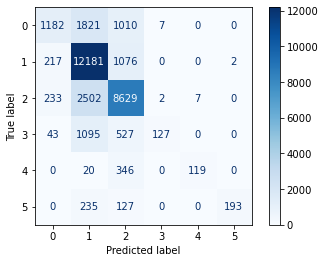

In [66]:
plot_confusion_matrix(class_forest4, X_test, y_test,cmap='Blues');
print(classification_report(y_test,preds_class_Rf4))

#### XGBoost Model

In [67]:
# XGboost object
classifier3 = XGBClassifier()
#  fit the model of XGboost
classifier3.fit(X_train, y_train)
y_pred_XGB = classifier3.predict(X_test)

/Users/shodz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.84      0.83      0.84      4020
           1       0.90      0.95      0.92     13476
           2       0.94      0.90      0.92     11373
           3       0.92      0.80      0.86      1792
           4       0.99      0.99      0.99       485
           5       0.99      0.99      0.99       555

    accuracy                           0.91     31701
   macro avg       0.93      0.91      0.92     31701
weighted avg       0.91      0.91      0.91     31701



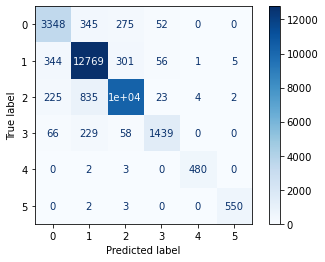

In [68]:
plot_confusion_matrix(classifier3, X=X_test, y_true=y_test, cmap='Blues')
print(classification_report(y_test, y_pred_XGB))

### Classification for Rate column


In [69]:
BookingMLCat["ReviewRatingVec"].value_counts(normalize=True)

3    0.658799
2    0.200165
4    0.121674
1    0.016268
0    0.003095
Name: ReviewRatingVec, dtype: float64

In [71]:
target = "ReviewRatingVec"
# feature set --> it cannot have the target 
X =BookingMLCat.drop(target, axis=1)
# target set 
y = BookingMLCat[target]
# split with  random_state= 42 and train size= 80% so the test size will be 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)


In [72]:
class_forest5 = RandomForestClassifier(n_estimators = 15, criterion = 'gini', random_state = 42, max_depth=8)
class_forest5.fit(X_train, y_train)
preds_class_Rf5 = class_forest5.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.83      0.90        77
           1       0.00      0.00      0.00       515
           2       0.87      0.59      0.70      6329
           3       0.84      0.91      0.87     20906
           4       0.59      0.71      0.64      3874

    accuracy                           0.81     31701
   macro avg       0.65      0.61      0.62     31701
weighted avg       0.80      0.81      0.80     31701



/Users/shodz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/shodz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shodz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

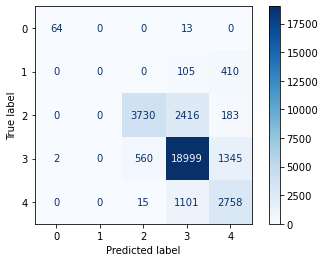

In [73]:
plot_confusion_matrix(class_forest5, X_test, y_test,cmap='Blues');
print(classification_report(y_test,preds_class_Rf5))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.82      0.80      0.81       515
           2       0.94      0.91      0.92      6329
           3       0.97      0.96      0.96     20906
           4       0.87      0.94      0.90      3874

    accuracy                           0.95     31701
   macro avg       0.92      0.92      0.92     31701
weighted avg       0.95      0.95      0.95     31701



/Users/shodz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


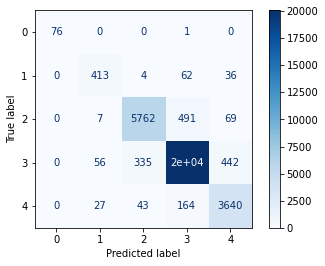

In [74]:
# XGboost object
classifier4 = XGBClassifier()
#  fit the model of XGboost
classifier4.fit(X_train, y_train)
y_pred_XGB = classifier4.predict(X_test)


plot_confusion_matrix(classifier4, X=X_test, y_true=y_test, cmap='Blues')
print(classification_report(y_test, y_pred_XGB))

------